# Day 1

## Importing necessary Libraries

In [2]:
import numpy as np                              # For mathematical operations and matrix manipulations
import pandas as pd                             # For Data Cleaning and performing operations on columns
from sklearn.preprocessing import LabelEncoder  # For Working with categorical data

In [3]:
df = pd.read_csv('data.csv')                    # Import the csv file as Dataframe

In [4]:
df.head()                                       # Peeking into first 5 samples

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [5]:
df.tail()                                       # Peeking into last 5 samples

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9
31526,35054,2017,2.0,28.0,14.0,5.0,14.6,1013.3,0.0,N,3.6


In [6]:
df.drop(columns='Unnamed: 0', inplace= True)    # Drop unnecesary columns

In [7]:
df.info()                                       # Provides initial info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            31512 non-null  object 
 1   month           31521 non-null  float64
 2   day             31507 non-null  float64
 3   hour            31519 non-null  float64
 4   PM2.5           31513 non-null  float64
 5   temperature     31508 non-null  float64
 6   pressure        31500 non-null  object 
 7   rain            31515 non-null  float64
 8   wind_direction  31467 non-null  object 
 9   wind_speed      31502 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.4+ MB


In [8]:
df.describe(include = 'all')                    # Brief quantitative description of the dataset

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,31512,31521.000000,31507.000000,31519.000000,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000
unique,6,NaN,NaN,NaN,NaN,NaN,566,NaN,16,NaN
top,2015,NaN,NaN,NaN,NaN,NaN,1019,NaN,NE,NaN
freq,8540,NaN,NaN,NaN,NaN,NaN,216,NaN,4465,NaN
mean,NaN,6.451001,15.413083,11.288429,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949
std,NaN,3.326838,33.139925,37.127145,3.575087e+05,11.296366,NaN,0.949720,NaN,1.338706
min,NaN,-37.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000
25%,NaN,4.000000,8.000000,5.000000,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000
50%,NaN,6.000000,15.000000,11.000000,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000
75%,NaN,9.000000,23.000000,18.000000,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000


# Conclusions from Description and Info:-
    -> There are 31527 samples in the dataset.
    -> All the Columns have a few NaN values.
    -> Date and Time are spread across four different columns.
        -> We shall convert them to standard Datetime format for better analysis.
    -> "PM2.5" stands for Particulate Matter particles that are less than 2.5 micrometer.
        -> The maximum value is exponentially greater than 75th percentile value.
    -> Temperature ranges from -16.8 units to +40.5 units.
    -> Pressure is available as object data type. So, conclusions shall be derived after conversion to numerical format.
    -> Rainfall is 0 for most of the cases(>75 % of the samples). 
    -> Wind Direction is a categorical data with 16 categories representing various directions.
    -> Wind Speed has a maximum value of 11.2 units. A negative minimum value represents presence of anomalies.

# Analysing date and time columns

In [9]:
# Year column consists values of string datatype. But, the length of string should be 4.
# So, we take advantage of this factor to get indices of rows with anomalies in the year column
year_anomalies = (df[df.year.str.len() != 4]).index 

# We use the year data of previous sample in the sample with anomaly.
for idx in year_anomalies:
    df.loc[idx, 'year'] = df.loc[idx - 1, 'year']

df.year = (df.year.astype(np.int32))                                    # Conversion to int datatype.
print(f"The number of anomalies in year was {len(year_anomalies)}")
df.loc[year_anomalies]

The number of anomalies in year was 16


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
944,2013,4.0,9.0,8.0,12.0,7.5,1015.1,0.0,NNW,6.2
2272,2013,6.0,3.0,18.0,105.0,29.0,999.6,0.0,SW,1.1
7553,2014,1.0,10.0,4.0,43.0,-8.7,1024.9,0.0,NE,1.4
8937,2014,3.0,9.0,22.0,74.0,3.4,1021.5,0.0,S,3.3
13710,2014,9.0,28.0,12.0,81.0,21.5,1010.5,0.0,W,NaN
13719,2014,9.0,28.0,23.0,76.0,15.4,1008.7,0.0,NE,0.4
15604,2015,1.0,1.0,16.0,41.0,2.0,1019,0.0,SW,2.8
18485,2015,5.0,4.0,13.0,14.0,21.7,1010.3,0.0,SW,4.3
23716,2015,12.0,NaN,11.0,269.0,1.8,1019.8,0.0,ESE,1.1


In [10]:
# Manually correcting the zeroth index to use it for other samples.
df.loc[0, 'month'] = 3.0

month_anomalies = (df[(df.month < 0)]).index                            # Month values can't be < 0.
month_anomalies = month_anomalies.append(df[df.month.isna()].index)

# We use the month data of previous sample in the sample with anomaly.
for idx in month_anomalies:
    df.loc[idx, 'month'] = df.loc[idx - 1, 'month']

df.month = (df.month.astype(np.int32))
print(f"The count of anomalies in months was {len(month_anomalies) + 1}")
df.loc[month_anomalies]

The count of anomalies in months was 8


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013,3,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
13709,2014,9,28.0,11.0,58.0,20.7,1010.9,0.0,E,0.7
15598,2015,1,1.0,10.0,15.0,-1.0,1029,0.0,ENE,1.1
18479,2015,5,4.0,7.0,10.0,15.2,1015.5,0.0,ENE,NaN
24181,2016,1,3.0,1.0,541.0,-3.3,1016.8,0.0,ENE,1.2
24877,2016,2,1.0,11.0,9.0,0.4,1032.7,0.0,NNW,4.0
30228,2016,9,30.0,5.0,77.0,13.2,1012.8,0.0,N,1.2


In [11]:
day_anomalies = (df[(df.day < 0)]).index                                 # Day values can't be < 0.          
day_anomalies = day_anomalies.append(df[df.day.isna()].index)

# We use the day data of previous sample in the sample with anomaly.
for idx in day_anomalies:
    df.loc[idx, 'day'] = df.loc[idx - 1, 'day']

df.day = (df.day.astype(np.int32))
print(f"The count of anomalies in days was {len(day_anomalies)}")
df.loc[day_anomalies]

The count of anomalies in days was 21


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24455,2016,1,14,12.0,91.0,3.0,1016.1,0.0,WNW,2.5
19,2013,3,1,19.0,8.0,2.3,1028.3,0.0,NaN,2.8
175,2013,3,8,7.0,309.0,5.7,1000.4,0.0,NNE,1.0
222,2013,3,10,6.0,18.0,-2.0,1022.5,0.0,N,0.0
368,2013,3,16,8.0,278.0,8.4,1020.7,0.0,W,1.1
463,2013,3,20,7.0,27.0,-2.3,1020.2,0.0,SSW,0.1
516,2013,3,22,12.0,63.0,9.2,1012.5,0.0,WSW,5.0
631,2013,3,27,7.0,186.0,5.3,1004.2,0.0,NNE,1.6
929,2013,4,8,17.0,32.0,9.8,1008.4,0.0,NNW,5.4
5543,2013,10,18,6.0,180.0,6.8,1020.6,0.0,ENE,1.2


In [12]:
hour_anomalies = (df[(df.hour < 0)]).index                                       # Hour values can't be < 0
hour_anomalies = hour_anomalies.append(df[df.hour.isna()].index)

# We use the hour data of previous sample in the sample with anomaly.
for idx in hour_anomalies:
    if (df.loc[idx - 1, 'hour'] == 23):                         # After 2300 hours, time goes to 00 hours.
        df.loc[idx, 'hour'] = 0
    else:
        df.loc[idx, 'hour'] = df.loc[idx - 1, 'hour'] + 1       # Dataset has a general movement of time in 1 hour.

df.hour = (df.hour.astype(np.int32))
print(f"The count of anomalies in hours was {len(hour_anomalies)}")
df.loc[hour_anomalies]

The count of anomalies in hours was 9


,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
24391,2016,1,11,20,15.0,-4.7,1031.2,0.0,NW,3.4
5,2013,3,1,5,5.0,-2.2,1025.6,0.0,N,3.7
627,2013,3,27,3,129.0,4.3,1001.7,0.0,W,0.8
936,2013,4,9,0,9.0,6.6,1010.4,0.0,NW,4.1
5554,2013,10,18,17,207.0,12.6,1017.9,0.0,SSE,0.0
7556,2014,1,10,7,24.0,-8.1,1025.3,0.0,NNE,1.3
24184,2016,1,3,4,407.0,-2.6,1017.3,0.0,E,1.8
25793,2016,3,11,18,31.0,6.6,1015.8,0.0,SW,3.7
25892,2016,3,16,4,230.0,2.8,1012.2,0.0,NE,1.2


In [13]:
df.describe(include = 'all')

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
count,31527.000000,31527.000000,31527.000000,31527.000000,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,566,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1019,NaN,NE,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,4465,NaN
mean,2014.516827,6.453167,15.590890,11.493069,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949
std,1.105097,3.309035,8.792301,6.932282,3.575087e+05,11.296366,NaN,0.949720,NaN,1.338706
min,2013.000000,1.000000,1.000000,0.000000,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000


# Conversion of dates and times from integers to a single column in Datetime format

In [14]:
df['Date'] = pd.to_datetime(df.day.astype(str) + "-" + df.month.astype(str) + "-" + df.year.astype(str) + " " + df.hour.astype(str) + ":00:00")

df.drop(columns=['year', 'month', 'day', 'hour'], inplace = True)

In [15]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,3.151300e+04,31508.000000,31500,31515.000000,31467,31502.000000,31527
unique,NaN,NaN,566,NaN,16,NaN,NaN
top,NaN,NaN,1019,NaN,NE,NaN,NaN
freq,NaN,NaN,216,NaN,4465,NaN,NaN
mean,2.095628e+03,14.356532,NaN,0.071744,NaN,1.696949,2015-01-04 18:42:04.921495808
min,3.000000e+00,-16.800000,NaN,0.000000,NaN,-79.000000,2013-01-03 00:00:00
25%,2.300000e+01,4.300000,NaN,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,5.800000e+01,15.800000,NaN,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,1.130000e+02,23.700000,NaN,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,6.346466e+07,40.500000,NaN,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM2.5           31513 non-null  float64       
 1   temperature     31508 non-null  float64       
 2   pressure        31500 non-null  object        
 3   rain            31515 non-null  float64       
 4   wind_direction  31467 non-null  object        
 5   wind_speed      31502 non-null  float64       
 6   Date            31527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.7+ MB


In [17]:
df = df.sort_values('Date')

In [18]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
0,4.0,-0.7,102-37,0.0,NNW,4.4,2013-01-03 00:00:00
1,8.0,-1.1,1023.2,0.0,N,NaN,2013-01-03 01:00:00
2,7.0,-1.1,1023.5,0.0,NNW,5.6,2013-01-03 02:00:00
3,6.0,-1.4,1024.5,0.0,NW,3.1,2013-01-03 03:00:00
4,3.0,-2.0,1025.2,0.0,N,2.0,2013-01-03 04:00:00


In [19]:
df.tail()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
31314,33.0,-0.250,1015,0.0,SW,1.1,2017-12-01 21:00:00
31315,19.0,2.025,1016,0.0,NW,3.0,2017-12-01 22:00:00
31316,15.0,3.675,1016.5,0.0,NW,2.4,2017-12-01 23:00:00
31477,60.0,-4.800,1024.1,0.0,NE,1.2,2017-12-02 08:00:00
31478,109.0,10.300,1020.4,0.0,S,1.6,2017-12-02 16:00:00


# Analysis on variation and outliers in Pressure

In [20]:
pressure_anomalies = df[df.pressure.isna()].index           # Getting indices of rows with NaN values of Pressure. 
print(len(pressure_anomalies))

27


In [21]:
df.loc[pressure_anomalies]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
2263,180.0,27.0,NaN,0.0,E,1.4,2013-03-06 09:00:00
628,135.0,2.9,NaN,0.0,W,0.9,2013-03-27 04:00:00
930,19.0,9.2,NaN,0.0,NW,5.0,2013-08-04 18:00:00
5550,234.0,16.8,NaN,0.0,N,1.0,2013-10-18 13:00:00
13195,143.0,23.9,NaN,0.0,SE,0.1,2014-07-09 01:00:00
8944,26.0,0.3,NaN,0.0,ENE,1.5,2014-10-03 05:00:00
15600,25.0,1.0,NaN,0.0,WSW,2.9,2015-01-01 12:00:00
15919,243.0,-1.7,NaN,0.0,ENE,1.4,2015-01-14 21:00:00
16229,26.0,NaN,NaN,NaN,NaN,NaN,2015-01-27 20:00:00
16733,13.0,NaN,NaN,NaN,NaN,NaN,2015-02-18 07:00:00


In [22]:
df.pressure.fillna(method='ffill', inplace=True)                # Fill Na using "forward fill method"

# Zeroth index had "102-37" as Pressure value. After analysing values of Pressure in other samples, it is most likely "1023.7".
# So, we manually corrected it.
df.loc[0, 'pressure'] = '1023.7'

df['pressure'] = df.pressure.astype(np.float64)

In [23]:
pressure_anomaly = df[df.pressure < 800].index
pressure_anomaly

Int64Index([24314], dtype='int64')

In [24]:
# Since there is only one anomaly, so we fix it manually.
df.loc[pressure_anomaly, 'pressure'] = df.loc[pressure_anomaly - 1, 'pressure']


In [25]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,3.151300e+04,31508.000000,31526.000000,31515.000000,31467,31502.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,2.095628e+03,14.356532,1011.015412,0.071744,NaN,1.696949,2015-01-04 18:42:04.921495808
min,3.000000e+00,-16.800000,985.900000,0.000000,NaN,-79.000000,2013-01-03 00:00:00
25%,2.300000e+01,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,5.800000e+01,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,1.130000e+02,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,6.346466e+07,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [26]:
# Pressure column is still containing an NaN value. So, using fillna to fix this.
df.pressure.fillna(method='ffill', inplace=True)

# Analysis of Wind Speed

In [27]:
df[df.wind_speed < 0]                                       # Peeking samples with negative wind speed.

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
23931,175.0,5.9,1021.7,0.0,NE,-66.0,2015-12-23 13:00:00
24132,209.0,-2.5,1024.5,0.0,NNE,-79.0,2016-01-01 00:00:00


In [28]:
wind_speed_anomaly = df[df.wind_speed < 0].index            # Got indices of samples with neg wind speed.

# We use average of wind speed of the sample before and and after the sample with anomaly to fix it.
for idx in wind_speed_anomaly:
    df.loc[idx, 'wind_speed'] = (df.loc[idx - 1, 'wind_speed'] + df.loc[idx + 1, 'wind_speed']) / 2

In [29]:
wind_speed_anomaly = df[df.wind_speed.isna()].index         # Getting indices of samples with NaN as wind speed.
df.loc[wind_speed_anomaly]                                  # Peeking samples with NaN as wind speed.

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
1,8.0,-1.1,1023.2,0.0,N,NaN,2013-01-03 01:00:00
11,3.0,NaN,1028.2,0.0,N,NaN,2013-01-03 11:00:00
2276,111.0,20.9,1001.7,0.0,E,NaN,2013-03-06 22:00:00
5542,198.0,6.7,1020.1,0.0,NE,NaN,2013-10-18 05:00:00
13710,81.0,21.5,1010.5,0.0,W,NaN,2014-09-28 12:00:00
7561,54.0,2.3,1023.6,0.0,WNW,NaN,2014-10-01 12:00:00
8942,NaN,0.3,1021.4,0.0,NE,NaN,2014-10-03 03:00:00
15602,51.0,3.0,1024.0,0.0,W,NaN,2015-01-01 14:00:00
16229,26.0,NaN,1030.5,NaN,NaN,NaN,2015-01-27 20:00:00
16733,13.0,NaN,1022.0,NaN,NaN,NaN,2015-02-18 07:00:00


In [30]:
df.wind_speed.fillna(method='ffill', inplace=True)                      # Filled NaN with previous values in wind speed column.

In [31]:
df.wind_speed.describe()

count    31527.000000
mean         1.701871
std          1.200389
min          0.000000
25%          0.900000
50%          1.400000
75%          2.200000
max         11.200000
Name: wind_speed, dtype: float64

In [32]:
# Since the maximum value of wind speed seems to be an outlier, we check the growth in wind speed towards the end.

l = [0.9, 0.95, 0.99, 0.995, 0.999, 0.9995, 0.9999]
for per in l:
    print(df.wind_speed.quantile(per))

3.4000000000000004
4.1
5.6
6.236999999999898
7.4
7.9237000000001
8.88473999999951


# Analysis of Particulate Matter(PM2.5)

In [33]:
df[df['PM2.5'].isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
22,NaN,0.9,1030.5,0.0,ENE,1.8,2013-01-03 22:00:00
657,NaN,7.4,1017.7,0.0,ENE,1.4,2013-03-28 09:00:00
662,NaN,12.7,1014.1,0.0,W,3.5,2013-03-28 14:00:00
942,NaN,6.1,1013.7,0.0,NNW,6.0,2013-09-04 06:00:00
5559,NaN,11.7,1019.0,0.0,NE,1.1,2013-10-18 22:00:00
13208,NaN,29.6,999.7,0.0,WSW,2.4,2014-07-09 14:00:00
7566,NaN,0.2,1024.1,0.0,SW,1.9,2014-10-01 17:00:00
8942,NaN,0.3,1021.4,0.0,NE,1.1,2014-10-03 03:00:00
24182,NaN,-3.2,1016.8,0.0,NE,1.0,2016-03-01 02:00:00
24185,NaN,-3.4,1017.9,0.0,E,2.1,2016-03-01 05:00:00


In [34]:
pm_anomaly = df[df['PM2.5'].isna()].index                       
df['PM2.5'].fillna(method = 'ffill', inplace= True)

df['PM2.5'].quantile(0.99)

363.73999999999796

In [35]:
pm_outliers = df[df['PM2.5'] > 1000].index
for idx in pm_outliers:
    df.loc[idx, 'PM2.5'] = df.loc[idx - 1, 'PM2.5']     # Forward_fill method

In [36]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31508.000000,31527.000000,31515.000000,31467,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,81.741818,14.356532,1011.015814,0.071744,NaN,1.701871,2015-01-04 18:42:04.921495808
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


# Analysis of Temperature

In [37]:
df[df.temperature.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
11,3.0,NaN,1028.2,0.0,N,3.6,2013-01-03 11:00:00
2269,50.0,NaN,998.1,0.0,WSW,3.9,2013-03-06 15:00:00
641,14.0,NaN,1005.5,0.0,NE,3.9,2013-03-27 17:00:00
939,8.0,NaN,1011.4,0.0,N,4.8,2013-09-04 03:00:00
16229,26.0,NaN,1030.5,NaN,NaN,0.4,2015-01-27 20:00:00
16733,13.0,NaN,1022.0,NaN,NaN,0.9,2015-02-18 07:00:00
19317,13.0,NaN,1001.6,0.0,NW,2.8,2015-08-06 10:00:00
24186,245.0,NaN,1018.3,0.0,ENE,0.9,2016-03-01 06:00:00
25002,13.0,NaN,1022.5,0.0,NW,3.2,2016-06-02 16:00:00
29988,75.0,NaN,1010.6,NaN,SW,3.1,2016-09-14 15:00:00


In [38]:
df.temperature.fillna(method='ffill', inplace = True)

# Analysis on Rainfall

In [39]:
df[df.rain.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
13713,70.0,22.0,1008.5,NaN,WSW,2.0,2014-09-28 15:00:00
16229,26.0,-5.2,1030.5,NaN,NaN,0.4,2015-01-27 20:00:00
16733,13.0,0.0,1022.0,NaN,NaN,0.9,2015-02-18 07:00:00
29988,75.0,29.5,1010.6,NaN,SW,3.1,2016-09-14 15:00:00
30163,168.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 19:00:00
30164,182.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 20:00:00
30165,137.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 21:00:00
30166,107.0,26.2,1009.0,NaN,NaN,1.3,2016-09-25 22:00:00
31359,126.0,-1.7,1025.0,NaN,NaN,1.0,2017-01-19 05:00:00
31360,104.0,-1.7,1025.0,NaN,NaN,1.0,2017-01-19 06:00:00


In [40]:
df.rain.fillna(method='ffill', inplace=True)

In [41]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31527.000000,31527.000000,31527.000000,31467,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4465,NaN,NaN
mean,81.741818,14.355340,1011.015814,0.071716,NaN,1.701871,2015-01-04 18:42:04.921495808
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


In [42]:
# Since the maximum value of rainfall seems to be an outlier, we check the growth in wind speed towards the end.

print(
    df.rain.quantile(0.90),
    df.rain.quantile(0.99),
    df.rain.quantile(0.999),
    df.rain.quantile(0.9999),
    df.rain.quantile(0.99999)

)

0.0 1.5 12.479200000001583 36.157459999985804 64.2717140000157


## Conclusions from analysis of Rain
    -> There is little or no rain on an average basis in the area over which data has been collected.
    -> Although most of the samples have zero rainfall, the movement towards the maximum value of rainfall is smooth.
    -> So, we've not considered 72.5 units of rainfall to be an outlier.

# Analysis on Wind Direction

In [43]:
df[df.wind_direction.isna()]

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
19,8.0,2.300000,1028.30,0.0,NaN,2.8,2013-01-03 19:00:00
6378,82.0,-3.200000,1020.50,0.0,NaN,0.1,2013-11-22 04:00:00
11599,44.0,21.500000,998.20,0.1,NaN,0.2,2014-02-07 06:00:00
13204,209.0,24.800000,1002.80,0.0,NaN,1.0,2014-07-09 10:00:00
13723,100.0,15.300000,1007.60,0.0,NaN,0.4,2014-09-29 03:00:00
8946,60.0,0.800000,1021.20,0.0,NaN,1.9,2014-10-03 07:00:00
13286,56.0,21.700000,1008.00,0.0,NaN,0.0,2014-10-09 20:00:00
16229,26.0,-5.200000,1030.50,0.0,NaN,0.4,2015-01-27 20:00:00
16733,13.0,0.000000,1022.00,0.0,NaN,0.9,2015-02-18 07:00:00
18488,22.0,22.600000,1006.80,0.0,NaN,5.0,2015-04-05 16:00:00


In [44]:
df.wind_direction.fillna(method='ffill', inplace=True)

In [45]:
df.wind_direction.describe(include='all')

count     31527
unique       16
top          NE
freq       4478
Name: wind_direction, dtype: object

In [46]:
df.wind_direction.unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'NE', 'ESE', 'E', 'WNW', 'S', 'SE',
       'WSW', 'SW', 'SSE', 'W', 'SSW'], dtype=object)

## Conclusions From Wind_Direction
    -> Wind Direction includes a total of 16 categorical variables.
    -> These are 4 main directions, "EAST", "WEST", "NORTH", "SOUTH". And the others are just combinations of these.
    -> Encoding of categorical varables depend on various parameters, including the problem statement, if the column is input variable or target variable, or the task is just to explore the dataset.
        -> We would use "One-hot Encoding" or "Label Encoding", whichever is suitable for the upcoming task/s.

# Now, that we have Clean Dataset, we save it as a new csv file to perform further analysis productively.

In [47]:
df.to_csv('Clean_Data.csv')

In [48]:
df.head()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
0,4.0,-0.7,1023.7,0.0,NNW,4.4,2013-01-03 00:00:00
1,8.0,-1.1,1023.2,0.0,N,4.4,2013-01-03 01:00:00
2,7.0,-1.1,1023.5,0.0,NNW,5.6,2013-01-03 02:00:00
3,6.0,-1.4,1024.5,0.0,NW,3.1,2013-01-03 03:00:00
4,3.0,-2.0,1025.2,0.0,N,2.0,2013-01-03 04:00:00


In [49]:
df.tail()

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
31314,33.0,-0.250,1015.0,0.0,SW,1.1,2017-12-01 21:00:00
31315,19.0,2.025,1016.0,0.0,NW,3.0,2017-12-01 22:00:00
31316,15.0,3.675,1016.5,0.0,NW,2.4,2017-12-01 23:00:00
31477,60.0,-4.800,1024.1,0.0,NE,1.2,2017-12-02 08:00:00
31478,109.0,10.300,1020.4,0.0,S,1.6,2017-12-02 16:00:00


In [50]:
df.describe(include='all', datetime_is_numeric=True)

,PM2.5,temperature,pressure,rain,wind_direction,wind_speed,Date
count,31527.000000,31527.000000,31527.000000,31527.000000,31527,31527.000000,31527
unique,NaN,NaN,NaN,NaN,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NE,NaN,NaN
freq,NaN,NaN,NaN,NaN,4478,NaN,NaN
mean,81.741818,14.355340,1011.015814,0.071716,NaN,1.701871,2015-01-04 18:42:04.921495808
min,3.000000,-16.800000,985.900000,0.000000,NaN,0.000000,2013-01-03 00:00:00
25%,23.000000,4.300000,1002.700000,0.000000,NaN,0.900000,2014-01-24 00:30:00
50%,58.000000,15.800000,1010.300000,0.000000,NaN,1.400000,2015-01-08 08:00:00
75%,113.000000,23.700000,1019.000000,0.000000,NaN,2.200000,2015-12-11 11:30:00
max,898.000000,40.500000,1042.000000,72.500000,NaN,11.200000,2017-12-02 16:00:00


**---------------------------------------------------------------------------------------------------------------------**

# Day 2

In [51]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'October', 'November', 'December']

In [52]:
# Importing libraries necessary for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31527 entries, 0 to 31478
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PM2.5           31527 non-null  float64       
 1   temperature     31527 non-null  float64       
 2   pressure        31527 non-null  float64       
 3   rain            31527 non-null  float64       
 4   wind_direction  31527 non-null  object        
 5   wind_speed      31527 non-null  float64       
 6   Date            31527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.9+ MB


In [54]:
df.set_index('Date', inplace=True)              # Set Data as index column

# Now, that we have clean data, we shall visualize different features in the dataset in different time-frames and try to gain some more insights about the data
    -> We shall plot the average of features in the dataset across all samples bases on "Hour, Month and Year" of the sample

# Temperature in different time frames

In [55]:
df.temperature.head()

Date
2013-01-03 00:00:00   -0.7
2013-01-03 01:00:00   -1.1
2013-01-03 02:00:00   -1.1
2013-01-03 03:00:00   -1.4
2013-01-03 04:00:00   -2.0
Name: temperature, dtype: float64

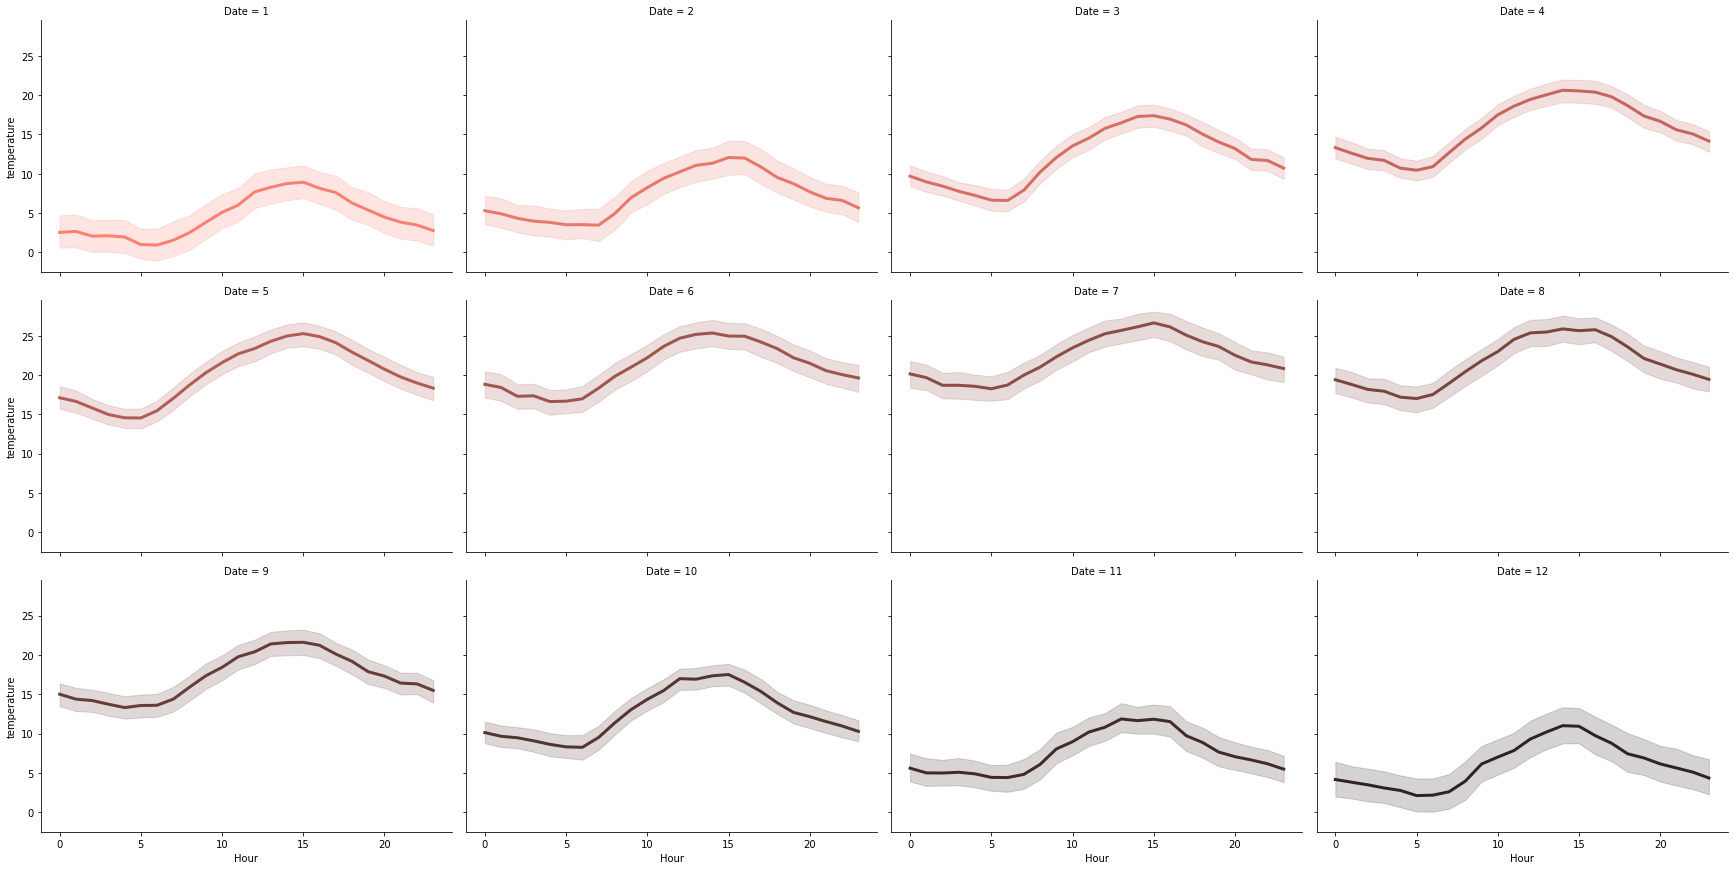

In [56]:
# Average Temperature of different times of a day in different months.
sns.relplot(
    data = df,
    x = df.index.hour,
    y = df.temperature,
    col = df.index.month, hue=df.index.month,
    kind = 'line', linewidth = 3,
    legend=False,
    height =4, aspect=1.5, col_wrap=4,
    palette= sns.color_palette("dark:salmon_r", as_cmap=True),

).set_xlabels('Hour')


## Observations from above plot-
    -> January and December are coldest months.
    -> June, July are hottest months
    -> Days are hottest at 1500 hours and coldest at 500-600 hours.

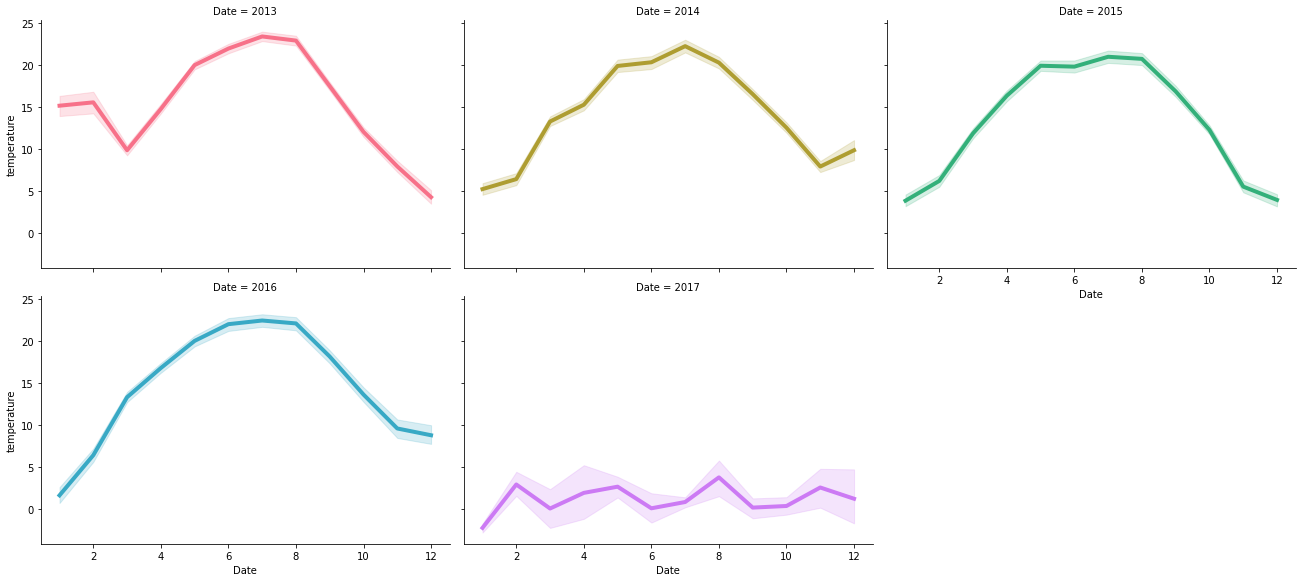

In [57]:
# Average Temperature of all months across different years.
sns.relplot(
    data = df,
    x = df.index.month, y = df.temperature,
    col = df.index.year, hue=df.index.year,
    kind = 'line', linewidth = 4,
    legend=False,
    height =4, aspect=1.5, zorder = 5, col_wrap=3,
    palette= sns.color_palette("husl", 5),   

)


## Observations-
    -> The data in the first 4 years are evenly spread.
    -> We shall dig deeper into how the samples are spread in 2017.
    -> This will help us know, if the values of temperature in 2017 are not correct, or the sample is unevenly spread.

# Digging Deep into 2017

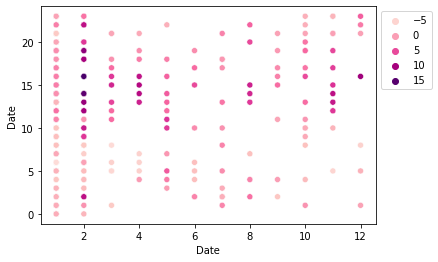

In [58]:

sns.scatterplot(
    x = df[df.index.year == 2017].index.month,
    y = df[df.index.year == 2017].index.hour,
    data = df[df.index.year == 2017],
    hue= df[df.index.year == 2017].temperature,
    palette= sns.color_palette("RdPu", as_cmap=True)
)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Observations-
    -> Most of the samples in 2017 belong to the months January, or February.
    -> So, the average temperature is very low in the case.

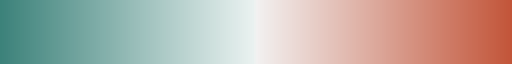

In [59]:
sns.diverging_palette(180, 20, as_cmap=True)

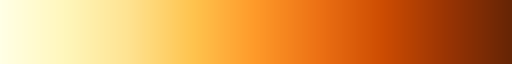

In [60]:
sns.color_palette("YlOrBr", as_cmap=True)